# Customer Churn Analysis and Prediction

### 1. Business Understanding
Churning refers to the number of customers who stopped using a particular product. Customer retention directly affects a company's revenue. Early detecion of customer churn enables businesses to take proactive measures to keep their customers. Knowing how and why customers leave and what can be done to win them back is vital for putting in targetted efforts to enhance customer retention and growth. This project aims to create a machine learning model for early customer churn prediction for the client, a telecommunication company.

### Hypotheses
***Null Hypothesis (H0)***: There is no correlation between Monthly Charges and Churn.

***Alternative Hypothesis (H1)***: Customers with higher Monthly Charges have a significantly higher churn rate.

### Analytical Questions
1. What is the distribution of gender and senior citizenship among customers?
2. Is there a significant difference in churn rate between male and female customers?
3. What is the churn rate for customers who prefer paperless biling compared to those who do not?
4. Does the choice of payment method impact customer churn?
5. How does customer tenure relate to churn rate?



### Import Required Modules

In [1]:
import pandas as pd
import numpy as np

In [2]:
#import necesssary modules
import pyodbc
from dotenv import dotenv_values
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')

### Getting the datasets from Various Sources

In [3]:
# Load environment variables from .env file into a dictionary
environment_variables=dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
database = environment_variables.get("DATABASE")
server = environment_variables.get("SERVER")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")

#code for connection 
connection_string=f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [4]:
# Use the connect method of the pyodbc library and pass in the connection string

connection = pyodbc.connect(connection_string)

Get training dataset from remote SQL Server

In [5]:
#write query statement to get dateset

query = "Select * from dbo.LP2_Telco_churn_first_3000"
df = pd.read_sql(query, connection)
 
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


Get testing dataset from a github repository

In [6]:
# get testing data from github repository and read dataset
data = pd.read_csv("C:\\Users\\Serwaa\\OneDrive\\lp2\\Customer-Churn-Analysis\\LP2_Telco-churn-last-2000.csv")

data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


Get last dataset which will be used for testing the accuracy of the ML models from a gihub repository. 

In [7]:
#install openpyxl to be able to open excel files in python
%pip install openpyxl

#read testing dataset 
data_testing = pd.read_excel("C:\\Users\\Serwaa\\onedrive\\lp2\\Customer-Churn-Analysis\\Telco-churn-second-2000.xlsx")
data_testing.head()

Note: you may need to restart the kernel to use updated packages.


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


### Data Cleaning and EDA

In [8]:
#get data shape to know number of rows and columns
df.shape

(3000, 21)

In [9]:
#check for duplicates in the dataset
df.duplicated().sum()

0

In [10]:
#get data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [11]:
#get summary statistics of numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,3000.0,32.527333,24.637768,0.000000,9.000000,29.000000,56.000000,72.000000
MonthlyCharges,3000.0,65.347400,30.137053,18.400000,35.787499,70.900002,90.262501,118.650002
TotalCharges,2995.0,2301.278315,2274.987884,18.799999,415.250000,1404.650024,3868.725098,8564.750000


In [12]:
#get summary statistics of categorical columns
df.describe(include="object").T

,count,unique,top,freq
customerID,3000,3000,7590-VHVEG,1
gender,3000,2,Male,1537
MultipleLines,2731,2,False,1437
InternetService,3000,3,Fiber optic,1343
OnlineSecurity,2349,2,False,1478
OnlineBackup,2349,2,False,1320
DeviceProtection,2349,2,False,1296
TechSupport,2349,2,False,1476
StreamingTV,2349,2,False,1190
StreamingMovies,2349,2,True,1199


In [13]:
#check for missing values
df.isna().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [14]:
# Drop rows with null values in the 'Churn' column since it has only one null value
df.dropna(subset=['Churn'], inplace=True)

In [15]:
#convert churn column to integer type

df['Churn'] = df['Churn'].astype(int)

In [16]:
#check for missing values
df.isna().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 0
dtype: int64

****Univariate analysis for some columns of interest****


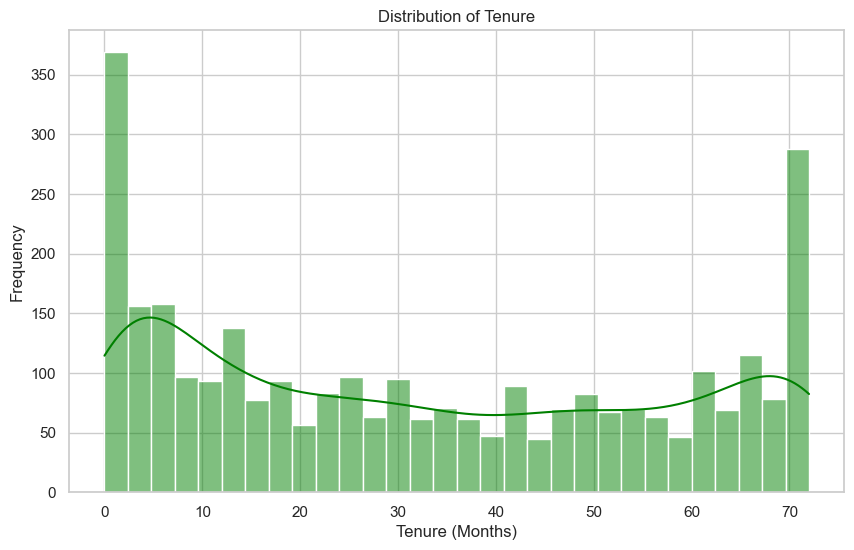

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Univariate Analysis for 'tenure'
plt.figure(figsize=(10, 6))
sns.histplot(df['tenure'], bins=30, kde=True, color='green')
plt.title('Distribution of Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Frequency')
plt.show()

The distribution of tenure (customer tenure in months) somewhat assymetrical, indicating that a significant number of customers have relatively shorter tenures with some others having long tenures.
This suggests that the customer base may have a mix of both long-term and short-term customers.

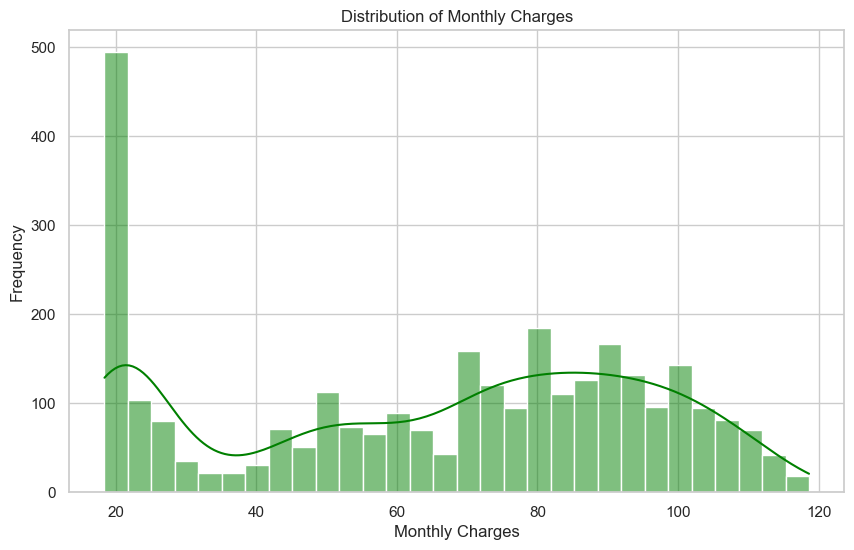

In [18]:
# Univariate Analysis for 'MonthlyCharges'
plt.figure(figsize=(10, 6))
sns.histplot(df['MonthlyCharges'], bins=30, kde=True, color='green')
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.show()

The distribution of monthly charges is somewhat bimodal, indicating the presence of two peaks or groups of customers with different spending patterns.
It might be interesting to investigate the factors contributing to the two groups and whether they have different churn behaviors.

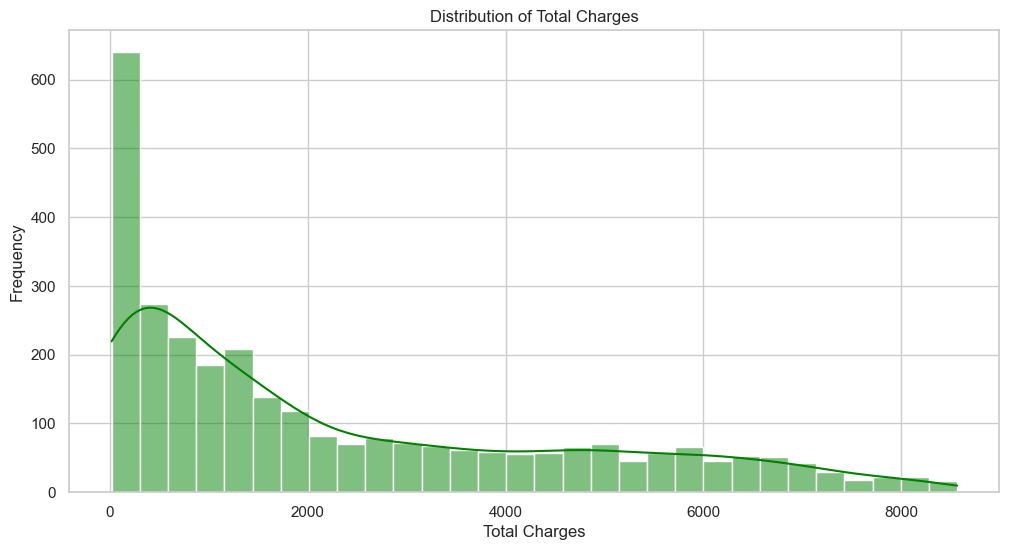

In [19]:
# Univariate Analysis for 'TotalCharges'
plt.figure(figsize=(12, 6))
sns.histplot(df['TotalCharges'], bins=30, kde=True, color='green')
plt.title('Distribution of Total Charges')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.show()

The distribution of total charges shows a positively skewed pattern, suggesting that there are a few customers with very high total charges Exploring this group could reveal insights into what makes them loyal and how we can enhance their experience.

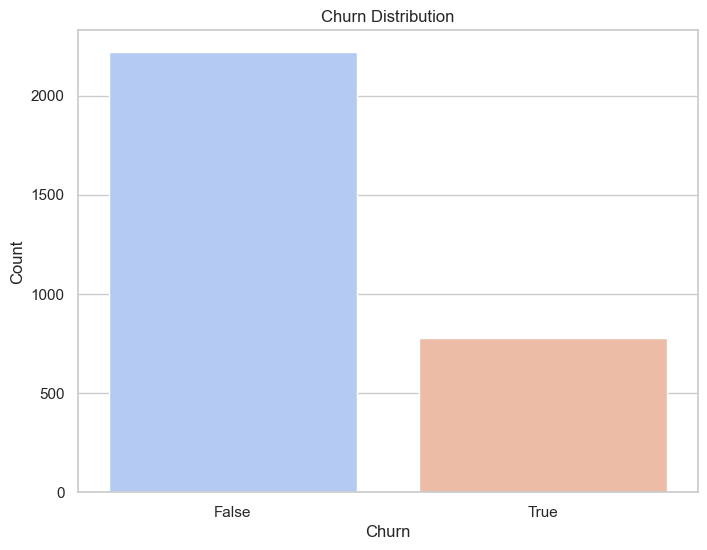

In [20]:
# Univariate Analysis for 'Churn'

# Create a count plot with custom tick labels
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=df, palette='coolwarm')

# Customize the tick labels
plt.xticks([0, 1], ['False', 'True'], rotation=0)

plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

The count plot for churn indicates the distribution of customers between those who churned ('Yes') and those who did not ('No'). Those who churned are very few compared to those who did not.
The class imbalance in the target variable ('Churn') should be considered when building machine learning models

****Bivariate Analysis****

<Axes: >

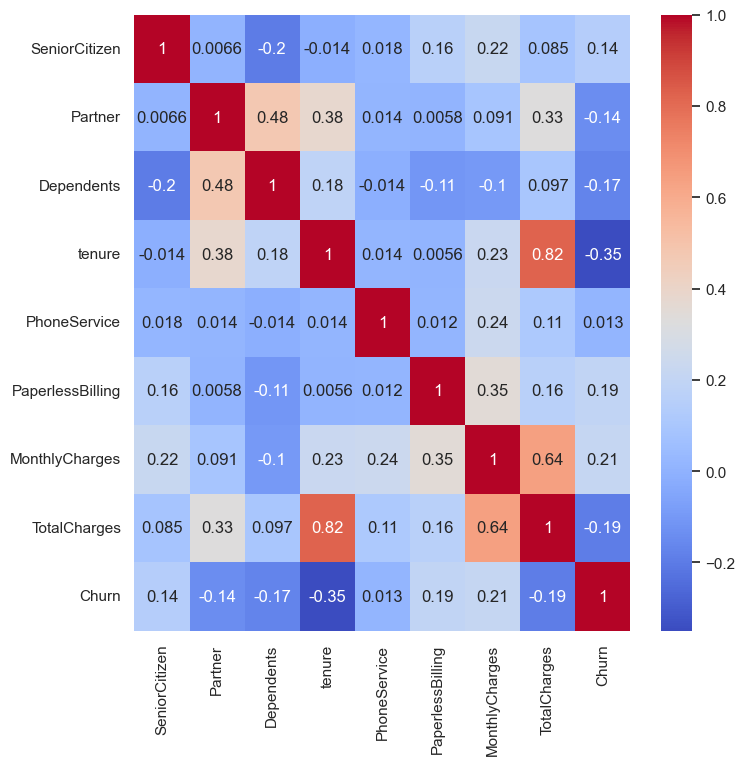

In [33]:
#plot a heatmap to show the correlations between the columns/features

correlation = df.corr(numeric_only=True)
plt.figure(figsize=(8,8))
sns.heatmap(data=correlation, annot=True, cmap='coolwarm')

There is a weak negative correlation between tenure and churn. As tenure (customer loyalty) increases, there is a slight tendency for churn to decrease. This means longer-tenured customers may be more likely to stay with the service.

There is weak positive correlation between monthly charges and churn. Higher monthly charges are associated with a slightly higher likelihood of churn. This suggests that customers with higher charges may be more sensitive to pricing.

Also, there is Moderate positive correlation between monthly charges and total charges. This suggests that customers with higher monthly charges tend to have higher total charges, indicating that the two variables are positively associated.
There is also a strong positive correlation between tenure and total charges meaning customers with longer tenure tend to have higher total charges, suggesting that loyal customers accumulate more charges over time.

Bivariate analysis for some columns of interest

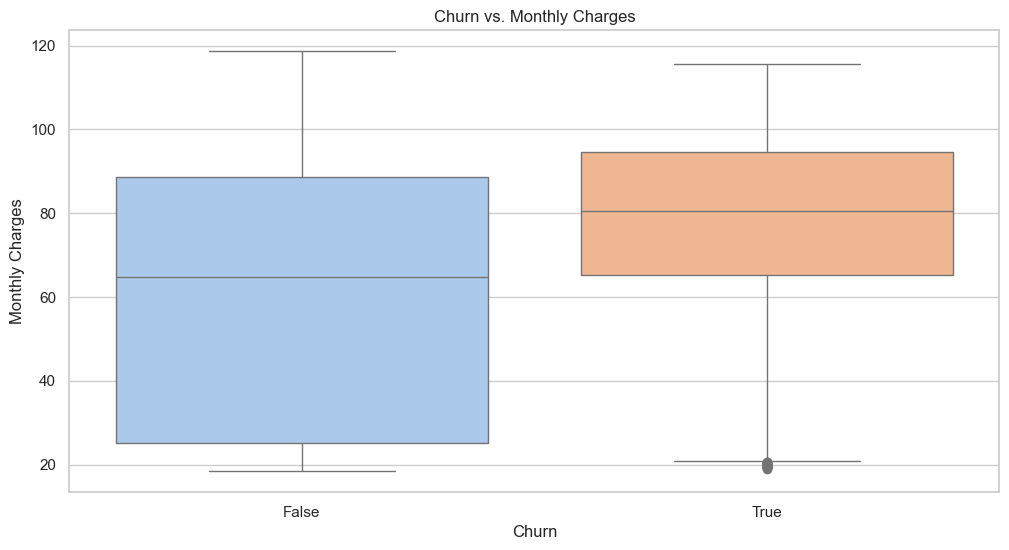

In [22]:

# Bivariate Analysis: Churn vs. Monthly Charges
# Set the style for the plot

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
plt.xticks([0, 1], ['False', 'True'], rotation=0)
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='pastel')
plt.title('Churn vs. Monthly Charges')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()


Insight: Customers who churn tend to have higher monthly charges on average compared to those who do not churn. This suggests that customers with higher monthly charges might be more likely to churn.

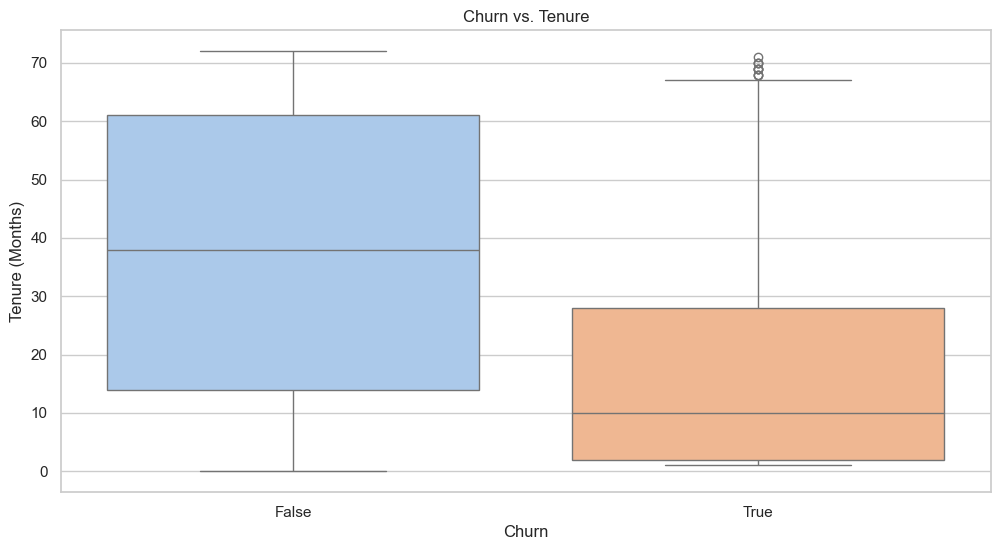

In [23]:
# Bivariate Analysis: Churn vs. Tenure
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.xticks([0, 1], ['False', 'True'], rotation=0)
sns.boxplot(x='Churn', y='tenure', data=df, palette="pastel")
plt.title('Churn vs. Tenure')
plt.xlabel('Churn')
plt.ylabel('Tenure (Months)')
plt.show()


Insight: Customers who churn generally have shorter tenure compared to customers who do not churn. This implies that newer customers may be more prone to churning.

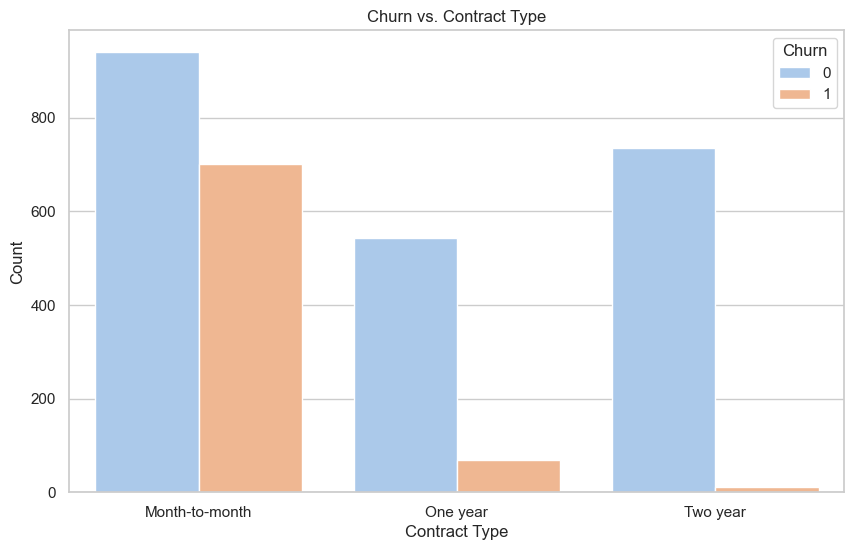

In [24]:
# Bivariate Analysis: Churn vs. Contract Type

plt.figure(figsize=(10, 6))
sns.countplot(x='Contract', hue='Churn', data=df, palette='pastel')
plt.title('Churn vs. Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()


Insight: Customers with month-to-month contracts are more likely to churn compared to those with one-year or two-year contracts. Long-term contract holders have a lower churn rate, indicating that contract type is a significant factor in customer retention

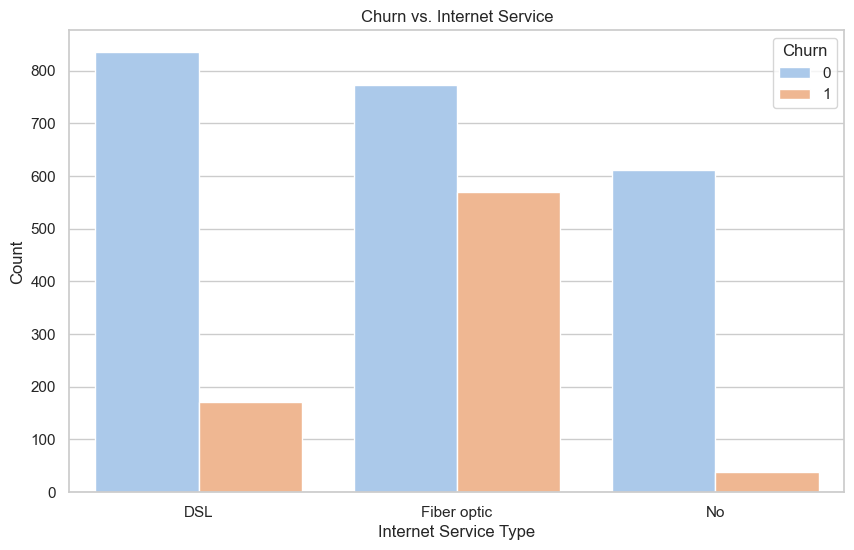

In [25]:
# Bivariate Analysis: Churn vs. Internet Service

plt.figure(figsize=(10, 6))
sns.countplot(x='InternetService', hue='Churn', data=df, palette='pastel')
plt.title('Churn vs. Internet Service')
plt.xlabel('Internet Service Type')
plt.ylabel('Count')
plt.show()


Insight: Customers with fiber optic internet service are more likely to churn compared to those with DSL or no internet service. This suggests that the type of internet service may impact customer satisfaction and retention.

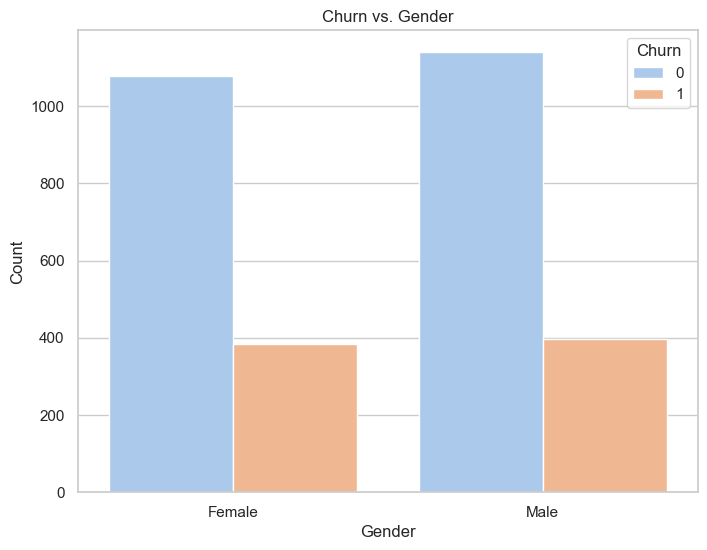

In [26]:
# Bivariate Analysis: Churn vs. Gender

plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='Churn', data=df, palette='pastel')
plt.title('Churn vs. Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


Insight: There doesn't appear to be a significant difference in churn between male and female customers. Churn rates seem comparable across gender groups, indicating that gender may not be a strong predictor of churn in this dataset.

****Multivariate Analysis****

<Figure size 1200x1200 with 0 Axes>

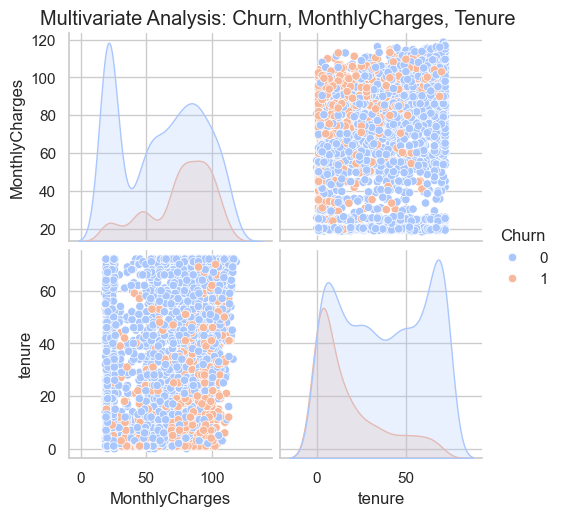

In [27]:
# columns of interest for this analysis are; Churn, Monthly charges, Tenure

# Subset the DataFrame for relevant columns
subset_df = df[['Churn', 'MonthlyCharges', 'tenure']]
plt.figure(figsize=(12,12))
# Create a pair plot
sns.pairplot(subset_df, hue='Churn', palette='coolwarm')
plt.suptitle('Multivariate Analysis: Churn, MonthlyCharges, Tenure', y=1.02)
plt.show()





Customers who churn tend to have higher monthly charges and shorter tenure.This suggests that customers with higher monthly charges and shorter tenure are more likely to churn. It aligns with the previous bivariate analyses where we observed higher monthly charges and shorter tenure associated with churn

Also, monthly charges and tenure exhibit some degree of negative correlation.
As tenure increases, there's a tendency for monthly charges to decrease. This could mean that long-term customers might be on older, lower-priced plans or that the company offers incentives for loyalty.

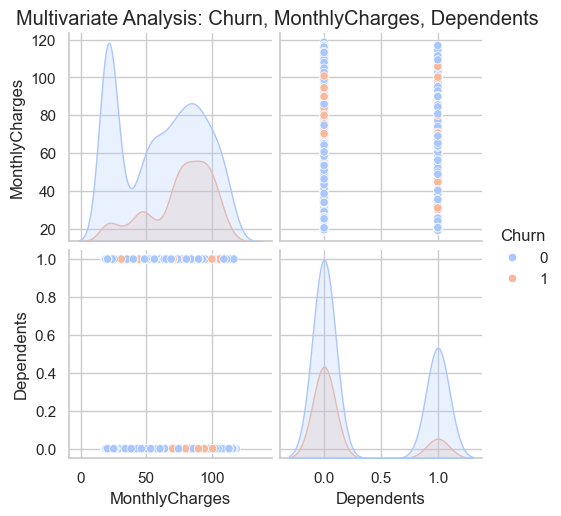

In [28]:
#Multivariate analysis for Churn, Dependents and Monthly charges
# Subset the DataFrame for relevant columns

subset_df_dependents = df[['Churn', 'MonthlyCharges', 'Dependents']]

# Create a pair plot
sns.pairplot(subset_df_dependents, hue='Churn', palette='coolwarm')
plt.suptitle('Multivariate Analysis: Churn, MonthlyCharges, Dependents', y=1.02)
plt.show()


Customers with dependents generally have lower monthly charges.It seems that customers with dependents tend to opt for more cost-effective plans, possibly influenced by the need to manage family expenses. 
Also, Churn appears to occur across various monthly charge levels for both customers with and without dependents.Churn is not solely dependent on monthly charges or the presence of dependents. Other factors may contribute to customer churn, and it's essential to consider a holistic view of customer characteristics.

### Answering Analytical Questions

1. What is the distribution of gender and senior citizenship among customers?

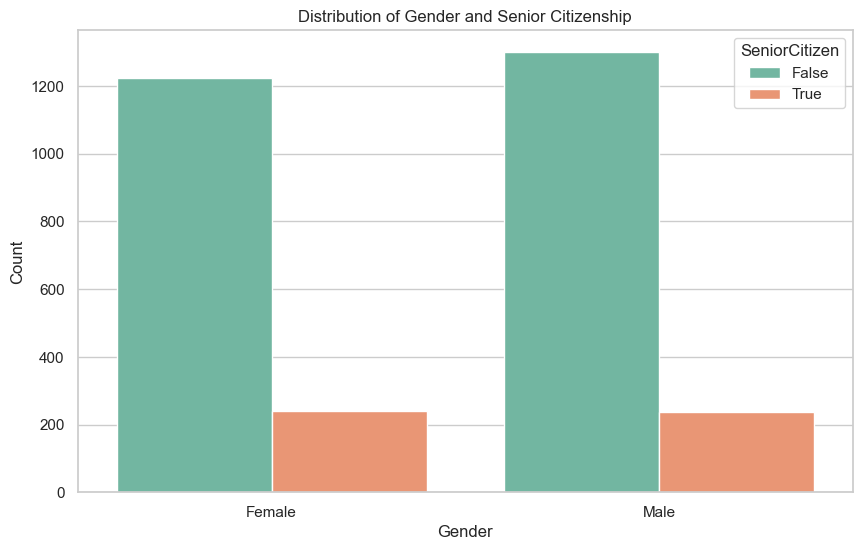

In [29]:

plt.figure(figsize=(10, 6))
sns.set_palette("Set2")  
sns.countplot(x='gender', hue='SeniorCitizen', data=df)
plt.title('Distribution of Gender and Senior Citizenship')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()



This plot shows a general demographic of customers. While the majority are non-senior citizens, there are notable segments of senior citizens within both genders. Exploring churn patterns within these segments can guide targeted retention strategies and inform tailored marketing campaigns for enhanced customer satisfaction and loyalty.

2. Is there a significant difference in churn rate between male and female customers?

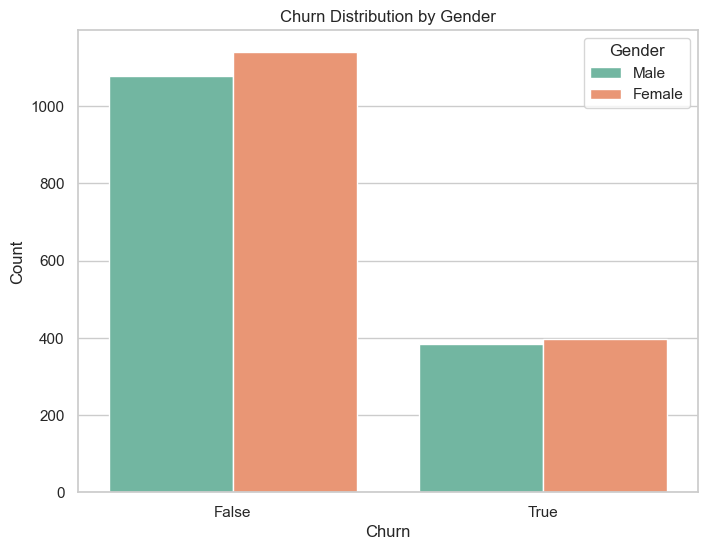

Churn          0         1
gender                    
Female  0.737526  0.262474
Male    0.742188  0.257812


In [30]:
plt.figure(figsize=(8, 6))
plt.xticks([0, 1], ['False', 'True'], rotation=0)
sns.set_palette("Set2")

# Create a countplot for the distribution of churn based on gender
sns.countplot(x='Churn', hue='gender', data=df, palette="Set2")

plt.title('Churn Distribution by Gender')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.show()

# Additionally, Calculate churn rates for male and female customers
churn_rates = df.groupby('gender')['Churn'].value_counts(normalize=True).unstack()

print(churn_rates)


For female customers, the churn rate is approximately 27% and for male customers, the churn rate is approximately 26%.
There is a marginal difference in churn rates between male and female customers, with female customers having a slightly higher churn rate.

3. What is the churn rate for customers who prefer paperless biling compared to those who do not?

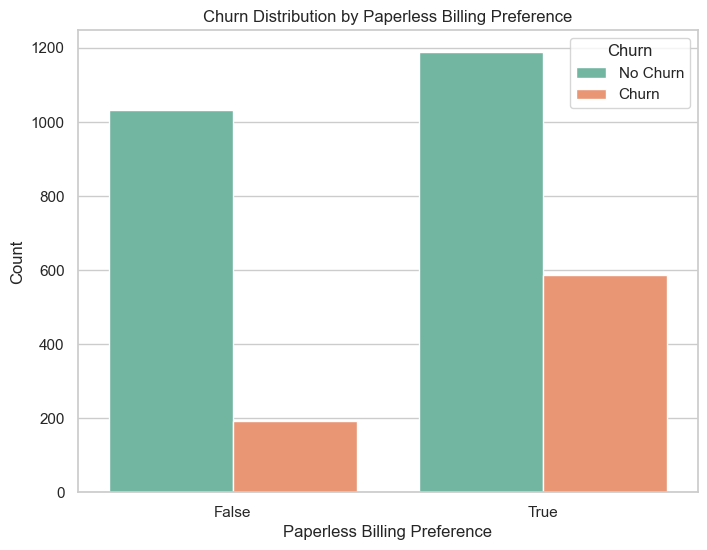

Churn                    0         1
PaperlessBilling                    
False             0.842320  0.157680
True              0.669296  0.330704


In [31]:
plt.figure(figsize=(8, 6))
sns.set_palette("Set2")

# Create a countplot for the distribution of churn based on paperless billing preference
sns.countplot(x='PaperlessBilling', hue='Churn', data=df, palette='Set2')

plt.title('Churn Distribution by Paperless Billing Preference')
plt.xlabel('Paperless Billing Preference')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['paperless biling', ''])
plt.show()

# Calculate churn rates for customers based on paperless billing preference
churn_rates_paperless = df.groupby('PaperlessBilling')['Churn'].value_counts(normalize=True).unstack()

# Print the churn rates
print(churn_rates_paperless)

For customers who do not prefer paperless billing, the churn rate is approximately 16% and for customers who prefer paperless billing, the churn rate is approximately 34%. Customers who prefer paperless billing have a higher churn rate compared to those who do not.The higher churn rate among customers who prefer paperless billing suggests a potential correlation between this billing preference and churn behavior.

4. Does the choice of payment method impact customer churn?

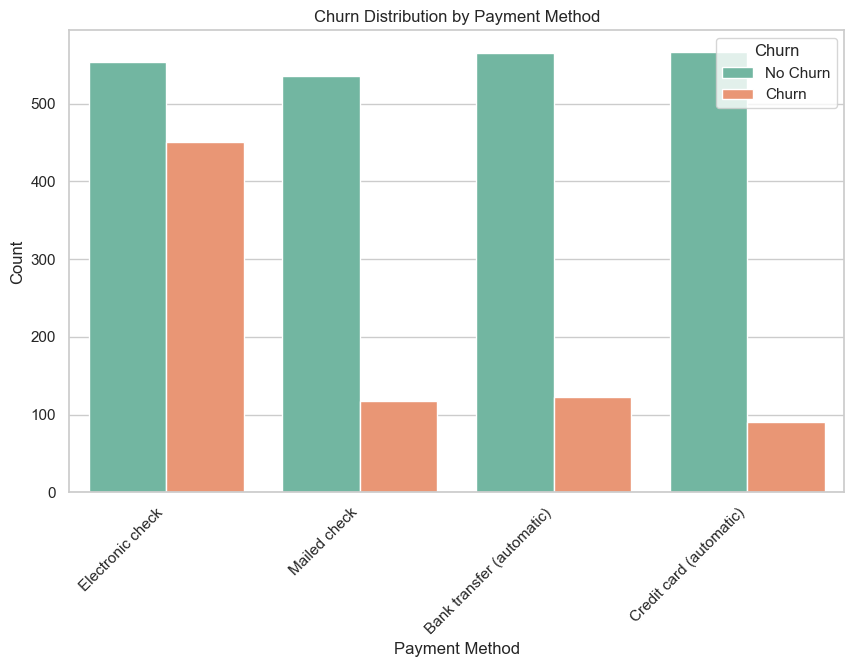

Churn                             0         1
PaymentMethod                                
Bank transfer (automatic)  0.822416  0.177584
Credit card (automatic)    0.861492  0.138508
Electronic check           0.551346  0.448654
Mailed check               0.820552  0.179448


In [32]:

plt.figure(figsize=(10, 6))
sns.set_palette("Set2")

# Create a countplot for the distribution of churn based on payment method
sns.countplot(x='PaymentMethod', hue='Churn', data=df, palette="Set2")

plt.title('Churn Distribution by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  #
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.show()

# In addition, Calculate churn rates for customers based on payment method
churn_rates_payment = df.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).unstack()

# Print the churn rates
print(churn_rates_payment)

Bank Transfer (Automatic): Churn rate of approximately 17%.
Credit Card (Automatic): Churn rate of approximately 15%.
Electronic Check: Churn rate of approximately 45%.
Mailed Check: Churn rate of approximately 19%.

Notable variations in churn rates are observed across different payment methods.Electronic Check users have a significantly higher churn rate compared to other payment methods.The high churn rate for Electronic Check users suggests a potential correlation between this payment method and churn behavior. Consider alternative payment methods or implement strategies to improve customer retention for this segment.

5. How does customer tenure relate to churn rate?